In [1]:
import numpy as np
from math import  ceil, floor
import polars as pl
from polars import col
import seaborn as sns
import matplotlib.pyplot as plt

#                                               PMF
```js
        PMF = Probability Mass Function, used for 'DISCRETE RANDOM VARIABLES'.
              y = f(x), where y is the result(probability of x) and x is any random discrete value.

        SO in PMF we find the probability of a single discrete value and same for others.
```

shape: (6, 3)
┌──────┬───────┬─────────────┐
│ roll ┆ count ┆ probability │
│ ---  ┆ ---   ┆ ---         │
│ i32  ┆ u32   ┆ f64         │
╞══════╪═══════╪═════════════╡
│ 1    ┆ 1662  ┆ 0.1662      │
│ 2    ┆ 1694  ┆ 0.1694      │
│ 3    ┆ 1701  ┆ 0.1701      │
│ 4    ┆ 1680  ┆ 0.168       │
│ 5    ┆ 1684  ┆ 0.1684      │
│ 6    ┆ 1579  ┆ 0.1579      │
└──────┴───────┴─────────────┘


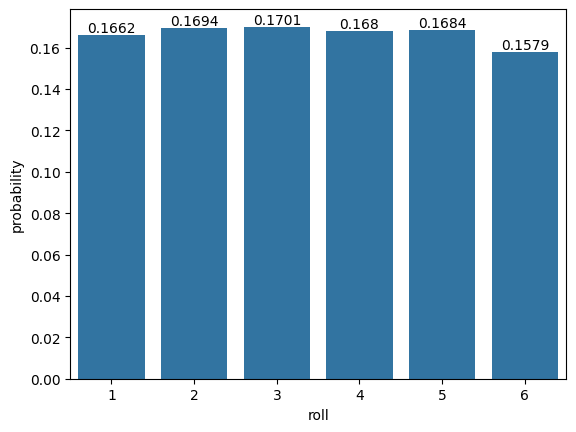

In [ ]:
"""
Q : list = [1, 5, 2, 3, 2, 6, 2]. What is the probability for each roll of dice?
---
Ans :
-----
    number of rolls occurred in list = 7

    So, P(1) = count_of(1) / 7 = 1 / 7
        P(2) = count_of(2) / 7 = 3 / 7
        P(3) = count_of(3) / 7 = 1 / 7
        P(4) = count_of(4) / 7 = 0 / 7
        P(5) = count_of(5) / 7 = 1 / 7
        P(6) = count_of(6) / 7 = 1 / 7
    
    1/7 + 3/7 + 1/7 + 0/7 + 1/7 + 1/7 = 1

    Now below we will roll THE dice RANDOMLY for 10_000 times and after finding their probability, we plot.
"""
# 1) Computing the rolls of dices 10_000 times. Then count of each unique roll and their probability.
rolls_of_dices = np.random.randint(low=1, high=7, size=(10_000,)) # high = exclusive
rolls_of_dices = pl.Series(name='roll', values=rolls_of_dices)

count_of_each_unique_roll = ( rolls_of_dices.value_counts()
                             .sort(by='roll')
                             .with_columns(probability = col('count') / rolls_of_dices.len()) # here probability = PMF
                            )
print(count_of_each_unique_roll)

# 2) Bar-plotting the probability(PMF) of each unique roll.
axes = sns.barplot(data=count_of_each_unique_roll, x='roll', y='probability')
axes.bar_label(container=axes.containers[0])
plt.show()

#                                                       PMF to CDF
```js
        What PMF does? It finds the Probability for each particular DISCREATE VALUE. e.g. :
                                        ┌──────┬──────────────────┐
                                        │ roll ┆ PMF(probability) │
                                        │ ---  ┆ ---------------- │
                                        │ i32  ┆ f64              │
                                        ╞══════╪══════════════════╡
                                        │ 1    ┆ 0.1693           │
                                        │ 2    ┆ 0.1627           │
                                        │ 3    ┆ 0.1699           │
                                        │ 4    ┆ 0.1657           │
                                        │ 5    ┆ 0.1718           │
                                        │ 6    ┆ 0.1606           │
                                        └──────┴──────────────────┘
        
        PMF => P(x=3)  = 0.1699                   -- Probability only for the value 3.
        CDF => P(x<=3) = P(x=3) + P(x=2) + P(x=1) -- Probability for all the values which are LESS THAN and EQUAL TO 3.
                       = 0.1699 + 0.1627 + 0.1693
                       = 0.5019

        So CDF(Cumulative Distribution Function) gives us the Probability from 1_to_x / upto_x / 'cumulative_sum_upto_x'.
        ----------------------------------------------------------------------------------------------------------------------------

        The last CDF value is ALWAYS 1 e.g. CDF for P(x<=6) = 1 where 6 is the LAST VALUE OF A DICE, we can''t have 7 of a Dice.
        Q   : Why the Last CDF value is 1?
        Ans :
        -----
              Imagine a bus has 100 seats. Now
              when the 1ST PASSENGER seats on his seat, he occupies 1/100 = 0.01 space,
              when the 2ND PASSENGER seats on his seat, he and 1ST PASSENGER occupies 2/100 = 0.02 space,
              when the 3RD PASSENGER seats on his seat, he and the other 2 PASSENGERS occupies 3/100 = 0.03 space,
              ..............................
              when the 80TH PASSENGER seats on his seat, he and the other 79 PASSENGERS occupies 80/100 = 0.8 space,
              ..............................
              when the 100TH PASSENGER seats on his seat, he and the other 99 PASSENGERS occupies 100/100 = 1 space.

              Here the values started from close_to_0(0.01) to 1 (NORMALIZED_VALUES / Probability_starts_from_0_to_1).
              So the moment the LAST VALUE/PASSENGER sat, the CDF value became 1 because :
                  x<=100 covers EVERYTHING(the below 99 passengerS and 100th itself),
                  P(x<=100) covers EVERYTHING(the below 99 passenger''s probabilities and 100th itself).
              Similarly for DICE :
                  x<=6    covers EVERYTHING(the below 5 roll and 6th roll itself),
                  P(x<=6) covers EVERYTHING(the below 5 roll''s probabilities and 6th roll itself).

              Even if the bus had 133 seats, right after 133th Passenger seats, the occupied space is 133/133 = 1 and "1 MEANS COVERED_UP_EVERYTHING". 
```

shape: (6, 4)
┌──────┬───────┬────────┬────────┐
│ roll ┆ count ┆ PMF    ┆ CDF    │
│ ---  ┆ ---   ┆ ---    ┆ ---    │
│ i32  ┆ u32   ┆ f64    ┆ f64    │
╞══════╪═══════╪════════╪════════╡
│ 1    ┆ 1657  ┆ 0.1657 ┆ 0.1657 │
│ 2    ┆ 1706  ┆ 0.1706 ┆ 0.3363 │
│ 3    ┆ 1674  ┆ 0.1674 ┆ 0.5037 │
│ 4    ┆ 1642  ┆ 0.1642 ┆ 0.6679 │
│ 5    ┆ 1625  ┆ 0.1625 ┆ 0.8304 │
│ 6    ┆ 1696  ┆ 0.1696 ┆ 1.0    │
└──────┴───────┴────────┴────────┘


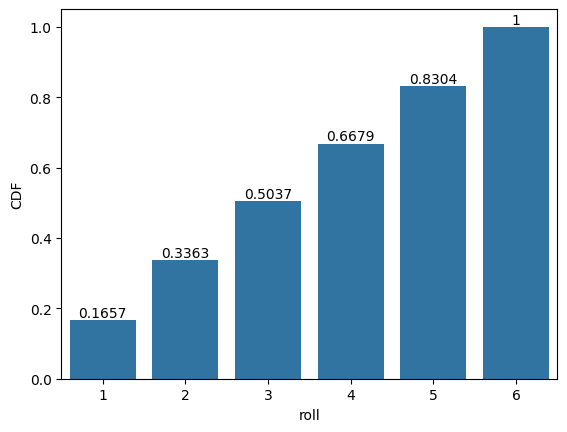

In [ ]:
# 1) Computing the rolls of dices 10_000 times. Then count of each unique roll, their PMF and CDF from PMF
rolls_of_dices = np.random.randint(low=1, high=7, size=(10_000,)) # high = exclusive
rolls_of_dices = pl.Series(name='roll', values=rolls_of_dices)

count_of_each_unique_roll = ( rolls_of_dices.value_counts()
                             .sort(by='roll')
                             .with_columns(PMF = col('count') / rolls_of_dices.len())
                             .with_columns(CDF = col('PMF').cum_sum())
                            )
print(count_of_each_unique_roll)

# 2) Bar-plotting the probability(CDF) of each unique roll.
axes = sns.barplot(data=count_of_each_unique_roll, x='roll', y='CDF')
axes.bar_label(container=axes.containers[0])
plt.show()

#                                                   Normal Distribution

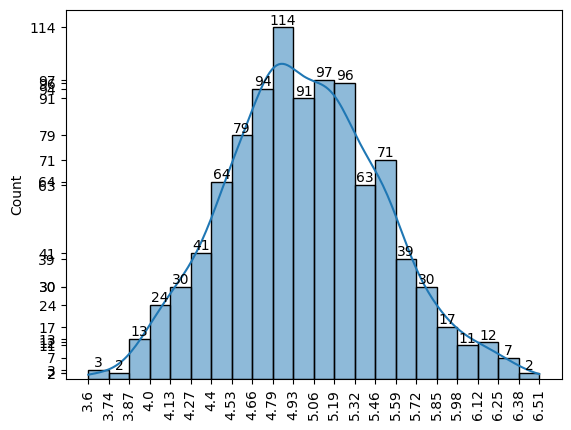

In [ ]:
sample = np.random.normal(loc=5, scale=0.5, size=(1000,))
ax = sns.histplot(x=sample, kde=True) # What Normal Distribution looks like as both histplot() and kdeplot().

bins_edges = np.array([patch.get_x() for patch in ax.patches] +
                      [ax.patches[-1].get_x() + ax.patches[-1].get_width()])

ax.set_xticks(ticks=bins_edges, labels=bins_edges.round(2), rotation=90)
ax.set_yticks(ticks=ax.containers[0].datavalues)
ax.bar_label(container=ax.containers[0])

plt.show()

#                                                               PDF
```js
        PDF = Probability Density Function, used for "CONTINUOUS RANDOM VARIABLES".
```